# ANALYSIS OF PG RESULTS OBTAINED FOR SYNTHETIC SAMPLES

In this notebook we will analyse the results obtained with `gls` periodogram module as applied to the synthetic samples S1, S2, S3 and S4 composed of 300 objects, which represent ideal RV time series being progressively degraded by observation noise and imperfect sampling.

The idea is to measure the performance of the periodogram analysis in terms of detected frequency and detected amplitude, as wel, as reported FAP (False Alarm Probability). In thart way, we could conceivably see how periodogram performance degrades as the source data is degraded by measurement errors and imperfect sampling.

## Modules and configuration

### Modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white", {'figure.figsize':(15,10)})

### Configuration

In [2]:
DATA_FILE = "../data/RV_ForPG_SyntheticDatasets_with_PG.csv"

SAMPLES = ['S1', 'S2', 'S3', 'S4']
SAMPLES_FULL_NAMES = {
    'S1': 'S1 (noiseless, perfect sampling)',
    'S2': 'S2 (noisy, perfect sampling)',
    'S3': 'S3 (noiseless. irregular sampling)',
    'S4': 'S4 (noisy, irregular sampling)'
}

IMAGE_FOLDER = './img/'

### Functions

In [3]:
def compare_multi_dist(samples_list, label_list, varname=None, xscale='linear', xzoom=None,
                       fig_title=None, fig_filename=None):
    '''Plots and saves overlapped histograms.'''
    # Plots and saves the figure
    kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,7))
    if fig_title is None:
        plt.title("Comparison of distributions", fontsize=16)
    else:
        plt.title(fig_title, fontsize=16)
    #plt.grid(axis='x', alpha=0.75)
    for i in range(0, len(samples_list)):
        sns.distplot(samples_list[i].dropna(), label=label_list[i], **kwargs)
    if varname is None:
        plt.xlabel("Value", fontsize=12)
    else:
        plt.xlabel(varname, fontsize=12)
    plt.ylabel('Frequency of occurrence', fontsize=12)
    #plt.xlim(0,100)
    plt.xscale(xscale)
    if xzoom is None:
        pass
    else:
        plt.xlim(xzoom)
    plt.legend(loc='upper right')
    plt.tight_layout()
    # Save the image:
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='jpg')
    # Perform the t-Student test (as independent samples):
    #stat, p = ttest_ind(d1, d2)
    #print('stat=%.3f, p=%.3f' % (stat, p))
    #if p > 0.05:
    #    print('Probably the same distribution')
    #else:
    #    print('***Probably different distributions')

In [107]:
##### SOMETHING IS WRONG WITH THIS FUNCTION: SCATTER PLOT DOES NOT WORK PROPERLY WHEN "hue" IS PASSED AS PARAMETER.
##### BUT A SIMILAR COMMAND WORKS FINE OUTSIDE THE FUNCTION
def scatter_graph(data, x, y, hue=None, size=None, alpha=0.75, fig_title=None, xlabel=None, ylabel=None, fig_filename=None):
    '''Plots a scatter plot of two columns of a dataframe.'''
    #kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,7))
    #plt.grid(axis='both', alpha=0.75)
#    sns.scatterplot(data=data, x=x, y=y, hue=hue, alpha=alpha)
#    plt.xlim(0.0, 1.0)
#    plt.ylim(0.0, 1.0)
    if fig_title is None:
        plt.title(var_y + " vs " + var_x, fontsize=16)
    else:
        plt.title(fig_title, fontsize=16)
    if xlabel is None:
        plt.xlabel(var_x, fontsize=12)
    else:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel is None:
        plt.ylabel(var_y, fontsize=12)
    else:
        plt.ylabel(ylabel, fontsize=12)

    #print("Hue = %s" %hue)
    sns.scatterplot(data=data, x=x, y=y, hue=hue, alpha=alpha)
    #sns.scatterplot(data=data, x=x, y=y, hue='Sample', alpha=alpha)
    plt.legend(loc='upper right');
    
    # Save the image:
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='jpg')
    # Calculate the Pearson correlation coefficient between the two results:
    #corr, _ = pearsonr(data[var_x], data[var_y])
    #print('Pearson\'s correlation value: %.3f' % corr)

## Load the file

In [46]:
df = pd.read_csv(DATA_FILE, sep=',', decimal='.')
df.head()

,ID,Pulsating,frequency,amplitudeRV,offsetRV,refepochRV,phase,S1_Ps,S1_Tobs,S2_errorRV_dist_idx,...,e_T0_PG_RV_S4,offset_PG_RV_S4,e_offset_PG_RV_S4,FAP_PG_RV_S4,valid_PG_RV_S4,error_PG_RV_S4,elapsed_time_PG_RV_S4,fits_file_RV_S4,PG_file_RV_S4,fig_file_RV_S4
0,Star-00000,True,19.790,0.730,0.000,"2,457,395.531",0.020,0.002,100.000,68,...,0.000,0.422,0.168,1.000,1.000,NaN,2.768,NaN,../data/S4_ForPG_RVs_PGs/Star-00000_RV_S4_PG.dat,../data/S4_ForPG_RVs_PGs/figures/Star-00000_RV...
1,Star-00001,False,0.000,0.000,0.000,"2,457,405.344",0.000,0.002,100.000,206,...,0.000,0.399,0.065,0.852,1.000,NaN,2.355,NaN,../data/S4_ForPG_RVs_PGs/Star-00001_RV_S4_PG.dat,../data/S4_ForPG_RVs_PGs/figures/Star-00001_RV...
2,Star-00002,False,0.000,0.000,0.000,"2,457,395.393",0.000,0.002,100.000,120,...,0.000,0.164,0.187,0.995,1.000,NaN,2.786,NaN,../data/S4_ForPG_RVs_PGs/Star-00002_RV_S4_PG.dat,../data/S4_ForPG_RVs_PGs/figures/Star-00002_RV...
3,Star-00003,True,47.090,0.570,0.000,"2,457,462.726",0.740,0.002,100.000,240,...,0.000,0.784,0.367,1.000,1.000,NaN,1.998,NaN,../data/S4_ForPG_RVs_PGs/Star-00003_RV_S4_PG.dat,../data/S4_ForPG_RVs_PGs/figures/Star-00003_RV...
4,Star-00004,True,54.970,0.810,0.000,"2,457,405.614",0.320,0.002,100.000,238,...,0.000,0.099,0.125,1.000,1.000,NaN,4.589,NaN,../data/S4_ForPG_RVs_PGs/Star-00004_RV_S4_PG.dat,../data/S4_ForPG_RVs_PGs/figures/Star-00004_RV...


In [47]:
df[['f_PG_RV_S1', 'A_PG_RV_S1', 'f_PG_RV_S2', 'A_PG_RV_S2', 'f_PG_RV_S3', 'A_PG_RV_S3', 'f_PG_RV_S4', 'A_PG_RV_S4']]

,f_PG_RV_S1,A_PG_RV_S1,f_PG_RV_S2,A_PG_RV_S2,f_PG_RV_S3,A_PG_RV_S3,f_PG_RV_S4,A_PG_RV_S4
0,19.790,0.730,19.790,0.716,19.790,0.720,115.250,1.717
1,2.400,0.000,211.980,0.031,2.400,0.000,159.060,1.041
2,2.400,0.000,251.050,0.036,2.400,0.000,86.740,1.603
3,47.090,0.570,47.090,0.579,47.090,0.562,118.630,6.684
4,54.970,0.810,54.970,0.802,54.970,0.811,212.300,0.886
...,...,...,...,...,...,...,...,...
295,59.960,0.360,59.960,0.376,59.960,0.358,109.740,2.763
296,43.870,0.890,43.870,0.879,43.870,0.872,59.700,3.131
297,48.080,1.440,48.080,1.451,48.080,1.381,158.810,3.263
298,47.940,1.280,47.940,1.323,47.940,1.272,107.420,35.407


In [48]:
print(list(df.columns))

['ID', 'Pulsating', 'frequency', 'amplitudeRV', 'offsetRV', 'refepochRV', 'phase', 'S1_Ps', 'S1_Tobs', 'S2_errorRV_dist_idx', 'S2_errorRV_dist_name', 'S2_errorRV_dist_loc', 'S2_errorRV_dist_scale', 'S2_errorRV_mean', 'S2_errorRV_median', 'S2_errorRV_stdev', 'S3_sampling_idx', 'S3_Tobs', 'S3_Ps_mean', 'S3_Ps_median', 'S3_Ps_stdev', 'S3_NumPoints', 'S4_errorRV_mean', 'S4_errorRV_median', 'S4_errorRV_stdev', 'S1_file', 'S2_file', 'S3_file', 'S4_file', 'n_RV_S1', 'Ps_RV_S1', 'fs_RV_S1', 'wmean_RV_S1', 'wrms_RV_S1', 'info_PG_RV_S1', 'maxP_PG_RV_S1', 'maxSNR_PG_RV_S1', 'rms_PG_RV_S1', 'f_PG_RV_S1', 'e_f_PG_RV_S1', 'Pd_PG_RV_S1', 'e_Pd_PG_RV_S1', 'Ph_PG_RV_S1', 'e_Ph_PG_RV_S1', 'Pm_PG_RV_S1', 'e_Pm_PG_RV_S1', 'A_PG_RV_S1', 'e_A_PG_RV_S1', 'ph_PG_RV_S1', 'e_ph_PG_RV_S1', 'T0_PG_RV_S1', 'e_T0_PG_RV_S1', 'offset_PG_RV_S1', 'e_offset_PG_RV_S1', 'FAP_PG_RV_S1', 'valid_PG_RV_S1', 'error_PG_RV_S1', 'elapsed_time_PG_RV_S1', 'fits_file_RV_S1', 'PG_file_RV_S1', 'fig_file_RV_S1', 'n_RV_S2', 'Ps_RV_S2', 

## Correlations between real and detected parameters

We now compute the Pearson correlation coefficient between the real parameter of the synthetic object and the detected (fitted) value in each of the cases (S1 through S4).

In [49]:
pd.options.display.float_format = '{:,.3f}'.format

### Frequency

In [50]:
corr_f = df[['frequency', 'f_PG_RV_S1', 'f_PG_RV_S2', 'f_PG_RV_S3', 'f_PG_RV_S4']] \
    .rename(columns={'frequency': 'True synthetic freq',
                     'f_PG_RV_S1': 'Detected freq in S1',
                     'f_PG_RV_S2': 'Detected freq in S2',
                     'f_PG_RV_S3': 'Detected freq in S3',
                     'f_PG_RV_S4': 'Detected freq in S4'}) \
    .corr()
corr_f

,True synthetic freq,Detected freq in S1,Detected freq in S2,Detected freq in S3,Detected freq in S4
True synthetic freq,1.000,1.000,-0.331,0.621,-0.023
Detected freq in S1,1.000,1.000,-0.315,0.619,-0.019
Detected freq in S2,-0.331,-0.315,1.000,-0.247,0.122
Detected freq in S3,0.621,0.619,-0.247,1.000,-0.055
Detected freq in S4,-0.023,-0.019,0.122,-0.055,1.000


In [51]:
corr_f = corr_f.loc[['True synthetic freq'],
                    ['Detected freq in S1', 'Detected freq in S2',
                     'Detected freq in S3', 'Detected freq in S4']] \
    .round(decimals=3)

corr_f

,Detected freq in S1,Detected freq in S2,Detected freq in S3,Detected freq in S4
True synthetic freq,1.000,-0.331,0.621,-0.023


In [52]:
print(corr_f.T.to_latex(float_format="%.3f", index=True))

\begin{tabular}{lr}
\toprule
{} &  True synthetic freq \\
\midrule
Detected freq in S1 &                1.000 \\
Detected freq in S2 &               -0.331 \\
Detected freq in S3 &                0.621 \\
Detected freq in S4 &               -0.023 \\
\bottomrule
\end{tabular}



#### Only pulsating stars

In [53]:
corr_f_p = df.loc[df['frequency'] != 0, ['frequency', 'f_PG_RV_S1', 'f_PG_RV_S2', 'f_PG_RV_S3', 'f_PG_RV_S4']] \
    .rename(columns={'frequency': 'True synthetic freq',
                     'f_PG_RV_S1': 'Detected freq in S1',
                     'f_PG_RV_S2': 'Detected freq in S2',
                     'f_PG_RV_S3': 'Detected freq in S3',
                     'f_PG_RV_S4': 'Detected freq in S4'}) \
    .corr()
corr_f_p

,True synthetic freq,Detected freq in S1,Detected freq in S2,Detected freq in S3,Detected freq in S4
True synthetic freq,1.000,1.000,0.291,0.456,0.106
Detected freq in S1,1.000,1.000,0.291,0.456,0.106
Detected freq in S2,0.291,0.291,1.000,0.083,0.081
Detected freq in S3,0.456,0.456,0.083,1.000,0.002
Detected freq in S4,0.106,0.106,0.081,0.002,1.000


In [54]:
corr_f_p = corr_f_p.loc[['True synthetic freq'],
                        ['Detected freq in S1', 'Detected freq in S2',
                         'Detected freq in S3', 'Detected freq in S4']] \
    .round(decimals=3)

corr_f_p

,Detected freq in S1,Detected freq in S2,Detected freq in S3,Detected freq in S4
True synthetic freq,1.000,0.291,0.456,0.106


In [55]:
print(corr_f_p.T.to_latex(float_format="%.3f", index=True))

\begin{tabular}{lr}
\toprule
{} &  True synthetic freq \\
\midrule
Detected freq in S1 &                1.000 \\
Detected freq in S2 &                0.291 \\
Detected freq in S3 &                0.456 \\
Detected freq in S4 &                0.106 \\
\bottomrule
\end{tabular}



### Amplitude

In [56]:
corr_A = df[['amplitudeRV', 'A_PG_RV_S1', 'A_PG_RV_S2', 'A_PG_RV_S3', 'A_PG_RV_S4']] \
    .rename(columns={'amplitudeRV': 'True synthetic RV amplitude',
                     'A_PG_RV_S1': 'Detected RV amplitude in S1',
                     'A_PG_RV_S2': 'Detected RV amplitude in S2',
                     'A_PG_RV_S3': 'Detected RV amplitude in S3',
                     'A_PG_RV_S4': 'Detected RV amplitude in S4'}) \
    .corr()
corr_A

,True synthetic RV amplitude,Detected RV amplitude in S1,Detected RV amplitude in S2,Detected RV amplitude in S3,Detected RV amplitude in S4
True synthetic RV amplitude,1.000,1.000,0.530,0.992,-0.022
Detected RV amplitude in S1,1.000,1.000,0.530,0.992,-0.022
Detected RV amplitude in S2,0.530,0.530,1.000,0.523,0.729
Detected RV amplitude in S3,0.992,0.992,0.523,1.000,-0.023
Detected RV amplitude in S4,-0.022,-0.022,0.729,-0.023,1.000


In [57]:
corr_A = corr_A.loc[['True synthetic RV amplitude'],
                    ['Detected RV amplitude in S1', 'Detected RV amplitude in S2',
                     'Detected RV amplitude in S3', 'Detected RV amplitude in S4']] \
    .round(decimals=3)

corr_A

,Detected RV amplitude in S1,Detected RV amplitude in S2,Detected RV amplitude in S3,Detected RV amplitude in S4
True synthetic RV amplitude,1.000,0.530,0.992,-0.022


In [58]:
print(corr_A.T.to_latex(float_format="%.3f", index=True))

\begin{tabular}{lr}
\toprule
{} &  True synthetic RV amplitude \\
\midrule
Detected RV amplitude in S1 &                        1.000 \\
Detected RV amplitude in S2 &                        0.530 \\
Detected RV amplitude in S3 &                        0.992 \\
Detected RV amplitude in S4 &                       -0.022 \\
\bottomrule
\end{tabular}



#### Only pulsating stars

In [59]:
corr_A_p = df.loc[df['amplitudeRV'] != 0, ['amplitudeRV', 'A_PG_RV_S1', 'A_PG_RV_S2', 'A_PG_RV_S3', 'A_PG_RV_S4']] \
    .rename(columns={'amplitudeRV': 'True synthetic RV amplitude',
                     'A_PG_RV_S1': 'Detected RV amplitude in S1',
                     'A_PG_RV_S2': 'Detected RV amplitude in S2',
                     'A_PG_RV_S3': 'Detected RV amplitude in S3',
                     'A_PG_RV_S4': 'Detected RV amplitude in S4'}) \
    .corr()
corr_A_p

,True synthetic RV amplitude,Detected RV amplitude in S1,Detected RV amplitude in S2,Detected RV amplitude in S3,Detected RV amplitude in S4
True synthetic RV amplitude,1.000,1.000,0.788,0.984,0.040
Detected RV amplitude in S1,1.000,1.000,0.788,0.984,0.040
Detected RV amplitude in S2,0.788,0.788,1.000,0.768,0.542
Detected RV amplitude in S3,0.984,0.984,0.768,1.000,0.035
Detected RV amplitude in S4,0.040,0.040,0.542,0.035,1.000


In [60]:
corr_A_p = corr_A_p.loc[['True synthetic RV amplitude'],
                        ['Detected RV amplitude in S1', 'Detected RV amplitude in S2',
                         'Detected RV amplitude in S3', 'Detected RV amplitude in S4']] \
    .round(decimals=3)

corr_A_p

,Detected RV amplitude in S1,Detected RV amplitude in S2,Detected RV amplitude in S3,Detected RV amplitude in S4
True synthetic RV amplitude,1.000,0.788,0.984,0.040


In [61]:
print(corr_A_p.T.to_latex(float_format="%.3f", index=True))

\begin{tabular}{lr}
\toprule
{} &  True synthetic RV amplitude \\
\midrule
Detected RV amplitude in S1 &                        1.000 \\
Detected RV amplitude in S2 &                        0.788 \\
Detected RV amplitude in S3 &                        0.984 \\
Detected RV amplitude in S4 &                        0.040 \\
\bottomrule
\end{tabular}



## Errors in frequency and amplitude detection

In [62]:
pd.options.display.float_format = '{:,.3f}'.format

We now compute the absolute and relative errors in the detection of frequency and amplitude:

In [63]:
# Absolute errors:
for sample in SAMPLES:
    df['Absolute_error_freq_' + sample] = df['f_PG_RV_' + sample] - df['frequency']
    df['Absolute_error_amplitude_' + sample] = df['A_PG_RV_' + sample] - df['amplitudeRV']

# Relative errors:
for sample in SAMPLES:
    df['Relative_error_freq_' + sample] = df['Absolute_error_freq_' + sample] / df['frequency']
    df.loc[df['frequency'] == 0, 'Relative_error_freq_' + sample] = np.nan
    df['Relative_error_amplitude_' + sample] = df['Absolute_error_amplitude_' + sample] / df['amplitudeRV']
    df.loc[df['amplitudeRV'] == 0, 'Relative_error_amplitude_' + sample] = np.nan
    
df.head()

,ID,Pulsating,frequency,amplitudeRV,offsetRV,refepochRV,phase,S1_Ps,S1_Tobs,S2_errorRV_dist_idx,...,Absolute_error_freq_S4,Absolute_error_amplitude_S4,Relative_error_freq_S1,Relative_error_amplitude_S1,Relative_error_freq_S2,Relative_error_amplitude_S2,Relative_error_freq_S3,Relative_error_amplitude_S3,Relative_error_freq_S4,Relative_error_amplitude_S4
0,Star-00000,True,19.790,0.730,0.000,"2,457,395.531",0.020,0.002,100.000,68,...,95.460,0.987,0.000,0.000,0.000,-0.019,0.000,-0.014,4.824,1.352
1,Star-00001,False,0.000,0.000,0.000,"2,457,405.344",0.000,0.002,100.000,206,...,159.060,1.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Star-00002,False,0.000,0.000,0.000,"2,457,395.393",0.000,0.002,100.000,120,...,86.740,1.603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Star-00003,True,47.090,0.570,0.000,"2,457,462.726",0.740,0.002,100.000,240,...,71.540,6.114,0.000,0.000,0.000,0.016,0.000,-0.013,1.519,10.726
4,Star-00004,True,54.970,0.810,0.000,"2,457,405.614",0.320,0.002,100.000,238,...,157.330,0.076,0.000,0.000,0.000,-0.009,0.000,0.001,2.862,0.094


### Distribution of relative errors in frequency

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


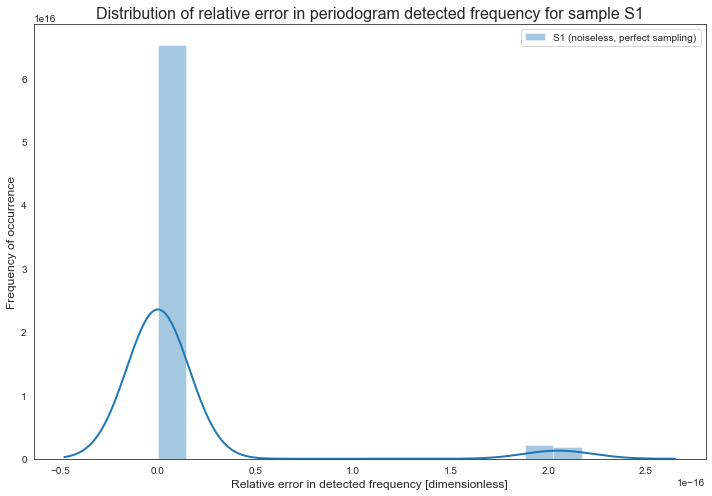

In [64]:
samples_list = []
label_list = []
for sample in SAMPLES[:1]:
    samples_list.append(df['Relative_error_freq_' + sample])
    label_list.append(SAMPLES_FULL_NAMES[sample])
varname = "Relative error in detected frequency [dimensionless]"
fig_title = 'Distribution of relative error in periodogram detected frequency for sample S1'
fig_filename = IMAGE_FOLDER + 'LSTPeriod_35_01_Distributions_freq_rel_errors_S1.jpg'

compare_multi_dist(samples_list=samples_list, label_list=label_list, varname=varname,
                   fig_title=fig_title, fig_filename=fig_filename)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

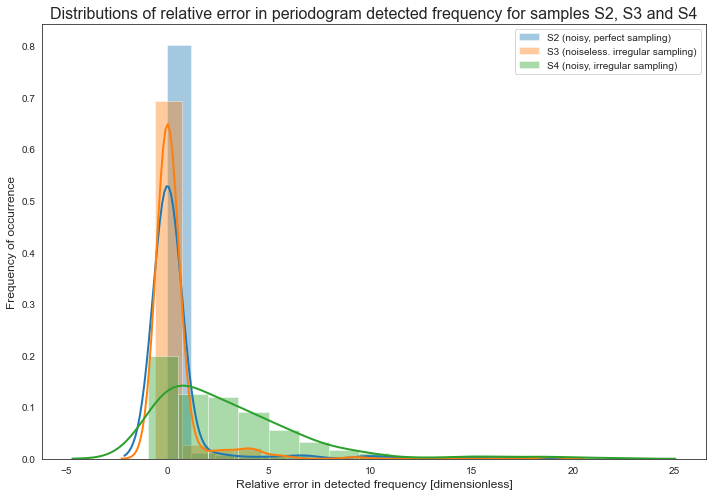

In [65]:
samples_list = []
label_list = []
for sample in SAMPLES[1:]:
    samples_list.append(df['Relative_error_freq_' + sample])
    label_list.append(SAMPLES_FULL_NAMES[sample])
varname = "Relative error in detected frequency [dimensionless]"
fig_title = "Distributions of relative error in periodogram detected frequency for samples S2, S3 and S4"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_02_Distributions_freq_rel_errors_S2_to_S4.jpg"

compare_multi_dist(samples_list=samples_list, label_list=label_list, varname=varname,
                   fig_title=fig_title, fig_filename=fig_filename)

### Distribution of relative errors in amplitude

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


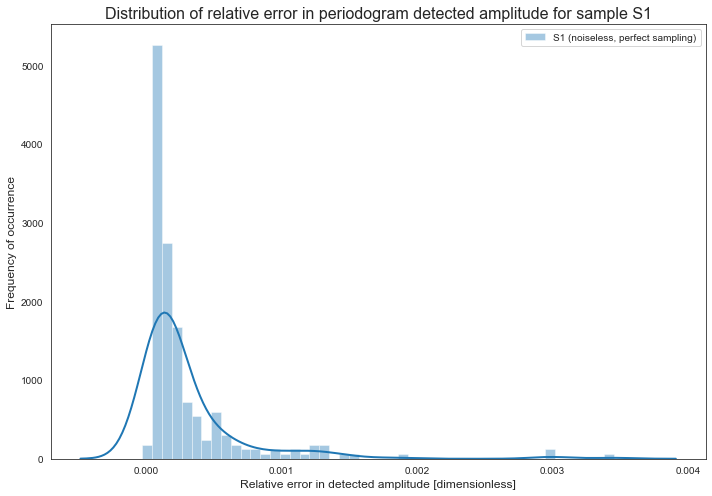

In [66]:
samples_list = []
label_list = []
for sample in SAMPLES[:1]:
    samples_list.append(df['Relative_error_amplitude_' + sample])
    label_list.append(SAMPLES_FULL_NAMES[sample])
varname = "Relative error in detected amplitude [dimensionless]"
fig_title = "Distribution of relative error in periodogram detected amplitude for sample S1"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_03_Distributions_amp_rel_errors_S1.jpg"

compare_multi_dist(samples_list=samples_list, label_list=label_list, varname=varname,
                   fig_title=fig_title, fig_filename=fig_filename)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


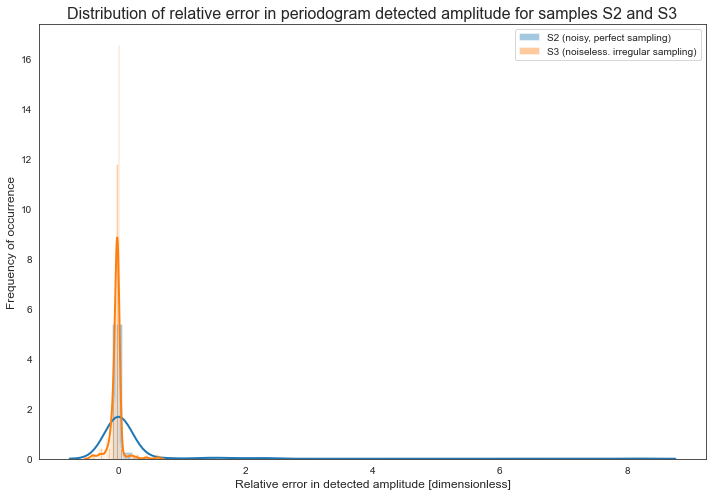

In [67]:
samples_list = []
label_list = []
for sample in SAMPLES[1:3]:
    samples_list.append(df['Relative_error_amplitude_' + sample])
    label_list.append(SAMPLES_FULL_NAMES[sample])
varname = "Relative error in detected amplitude [dimensionless]"
fig_title = "Distribution of relative error in periodogram detected amplitude for samples S2 and S3"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_04_Distributions_amp_rel_errors_S2_and_S3.jpg"

compare_multi_dist(samples_list=samples_list, label_list=label_list, varname=varname,
                   xscale='linear', xzoom=None,
                   fig_title=fig_title, fig_filename=fig_filename)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

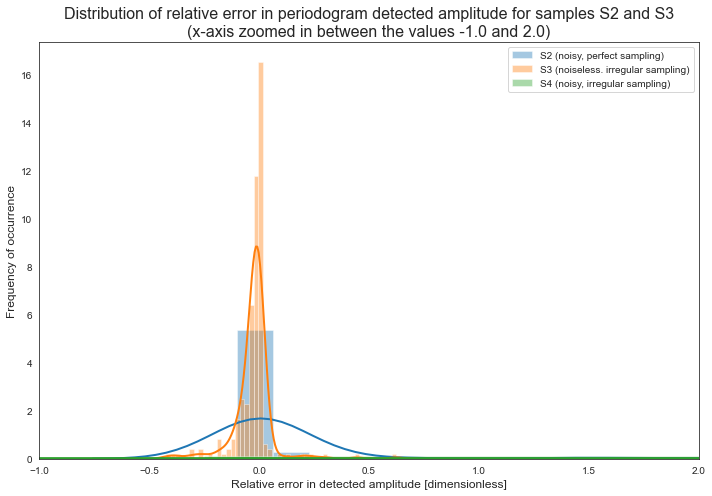

In [68]:
samples_list = []
label_list = []
for sample in SAMPLES[1:]:
    samples_list.append(df['Relative_error_amplitude_' + sample])
    label_list.append(SAMPLES_FULL_NAMES[sample])
varname = "Relative error in detected amplitude [dimensionless]"
xzoom = (-1, 2)
fig_title = "Distribution of relative error in periodogram detected amplitude for samples S2 and S3\n" \
    "(x-axis zoomed in between the values -1.0 and 2.0)"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_04B_Distributions_amp_rel_errors_S2_and_S3_ZOOM.jpg"

compare_multi_dist(samples_list=samples_list, label_list=label_list, varname=varname,
                   xscale='linear', xzoom=xzoom,
                   fig_title=fig_title, fig_filename=fig_filename)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


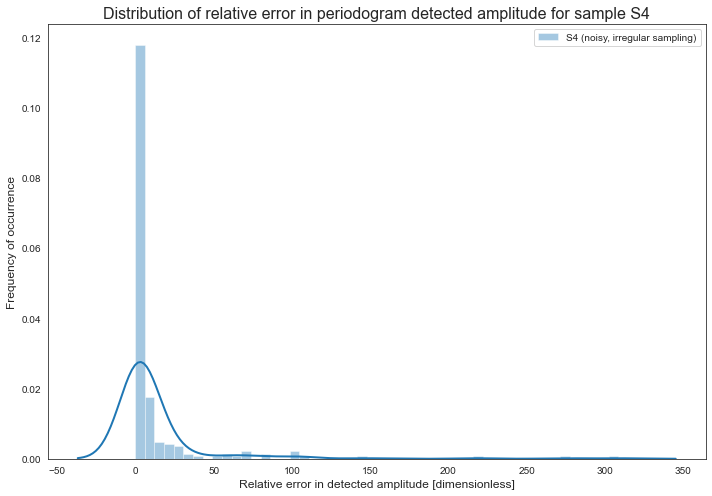

In [69]:
samples_list = []
label_list = []
for sample in SAMPLES[3:]:
    samples_list.append(df['Relative_error_amplitude_' + sample])
    label_list.append(SAMPLES_FULL_NAMES[sample])
varname = "Relative error in detected amplitude [dimensionless]"
fig_title = "Distribution of relative error in periodogram detected amplitude for sample S4"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_05_Distributions_amp_rel_errors_S4.jpg"

compare_multi_dist(samples_list=samples_list, label_list=label_list, varname=varname,
                   fig_title=fig_title, fig_filename=fig_filename)

### FAP distributions

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


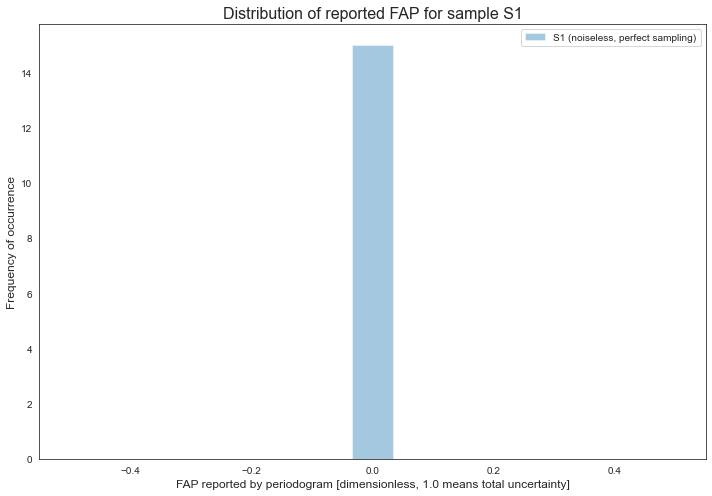

In [70]:
samples_list = []
label_list = []
for sample in SAMPLES[:1]:
    samples_list.append(df['FAP_PG_RV_' + sample])
    label_list.append(SAMPLES_FULL_NAMES[sample])
varname = "FAP reported by periodogram [dimensionless, 1.0 means total uncertainty]"
fig_title = "Distribution of reported FAP for sample S1"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_06_Distributions_FAP_S1.jpg"

compare_multi_dist(samples_list=samples_list, label_list=label_list, varname=varname,
                   fig_title=fig_title, fig_filename=fig_filename)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

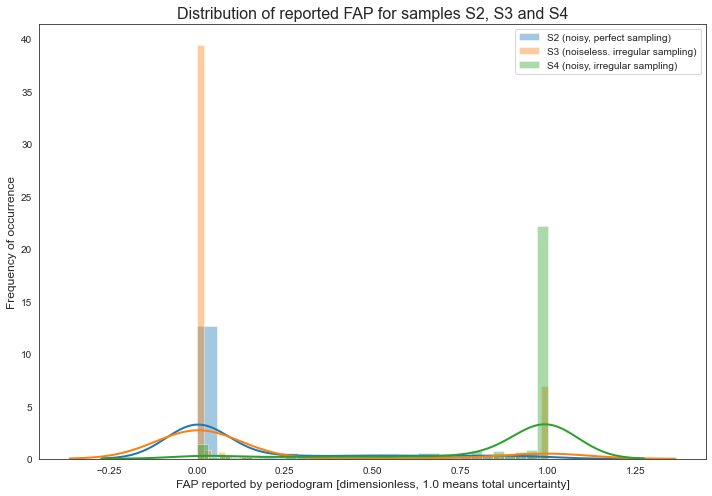

In [71]:
samples_list = []
label_list = []
for sample in SAMPLES[1:]:
    samples_list.append(df['FAP_PG_RV_' + sample])
    label_list.append(SAMPLES_FULL_NAMES[sample])
varname = "FAP reported by periodogram [dimensionless, 1.0 means total uncertainty]"
fig_title = "Distribution of reported FAP for samples S2, S3 and S4"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_07_Distributions_FAP_S2_to_S4.jpg"

compare_multi_dist(samples_list=samples_list, label_list=label_list, varname=varname,
                   fig_title=fig_title, fig_filename=fig_filename)

## Prepare more data for scatter and box plots

In [72]:
# NOTA - POCO EFECTIVO, HAY FUNCIONES DE PANDAS QUE SEGURAMENTE PERMITIRÁN HACERLO MÁS "ELEGANTE".
combined_df = None
for sample in SAMPLES:
    new_df = df[['frequency', 'amplitudeRV', 'f_PG_RV_' + sample, 'A_PG_RV_' + sample,
                 'Relative_error_freq_' + sample, 'Relative_error_amplitude_' + sample,
                 'FAP_PG_RV_' + sample]].copy()
    new_df.rename(columns={'frequency': 'True_freq',
                           'amplitudeRV': 'True_amp',
                           'f_PG_RV_' + sample: 'Det_freq',
                           'A_PG_RV_' + sample: 'Det_amp',
                           'Relative_error_freq_' + sample: 'RelError_freq',
                           'Relative_error_amplitude_' + sample: 'RelError_amp',
                           'FAP_PG_RV_' + sample: 'FAP'
                          },
                  inplace=True)
    new_df.insert(loc=0, column='Sample', value=SAMPLES_FULL_NAMES[sample])
    new_df.insert(loc=0, column='Sample_ID', value=sample)
    if combined_df is None:
        # Initialize:
        combined_df = new_df.copy()
    else:
        combined_df = pd.concat([combined_df, new_df]).reset_index(drop=True) 
combined_df

,Sample_ID,Sample,True_freq,True_amp,Det_freq,Det_amp,RelError_freq,RelError_amp,FAP
0,S1,"S1 (noiseless, perfect sampling)",19.790,0.730,19.790,0.730,0.000,0.000,0.000
1,S1,"S1 (noiseless, perfect sampling)",0.000,0.000,2.400,0.000,NaN,NaN,NaN
2,S1,"S1 (noiseless, perfect sampling)",0.000,0.000,2.400,0.000,NaN,NaN,NaN
3,S1,"S1 (noiseless, perfect sampling)",47.090,0.570,47.090,0.570,0.000,0.000,0.000
4,S1,"S1 (noiseless, perfect sampling)",54.970,0.810,54.970,0.810,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
1195,S4,"S4 (noisy, irregular sampling)",59.960,0.360,109.740,2.763,0.830,6.675,0.997
1196,S4,"S4 (noisy, irregular sampling)",43.870,0.890,59.700,3.131,0.361,2.518,1.000
1197,S4,"S4 (noisy, irregular sampling)",48.080,1.440,158.810,3.263,2.303,1.266,1.000
1198,S4,"S4 (noisy, irregular sampling)",47.940,1.280,107.420,35.407,1.241,26.662,1.000


In [118]:
combined_df.describe()

,True_freq,True_amp,Det_freq,Det_amp,RelError_freq,RelError_amp,FAP
count,"1,200.000","1,200.000","1,200.000","1,200.000",924.000,924.000,"1,062.000"
mean,30.761,0.640,70.625,2.961,0.967,3.199,0.320
std,23.050,0.493,72.800,16.037,2.577,18.942,0.436
min,0.000,0.000,2.400,0.000,-0.942,-0.423,0.000
25%,12.015,0.180,21.810,0.349,0.000,-0.004,0.000
50%,30.505,0.630,45.995,0.885,0.000,0.000,0.000
75%,50.185,1.045,72.735,1.369,0.000,0.129,0.906
max,71.850,1.500,284.470,352.090,21.306,308.459,1.000


In [119]:
print(list(df.columns))

['ID', 'Pulsating', 'frequency', 'amplitudeRV', 'offsetRV', 'refepochRV', 'phase', 'S1_Ps', 'S1_Tobs', 'S2_errorRV_dist_idx', 'S2_errorRV_dist_name', 'S2_errorRV_dist_loc', 'S2_errorRV_dist_scale', 'S2_errorRV_mean', 'S2_errorRV_median', 'S2_errorRV_stdev', 'S3_sampling_idx', 'S3_Tobs', 'S3_Ps_mean', 'S3_Ps_median', 'S3_Ps_stdev', 'S3_NumPoints', 'S4_errorRV_mean', 'S4_errorRV_median', 'S4_errorRV_stdev', 'S1_file', 'S2_file', 'S3_file', 'S4_file', 'n_RV_S1', 'Ps_RV_S1', 'fs_RV_S1', 'wmean_RV_S1', 'wrms_RV_S1', 'info_PG_RV_S1', 'maxP_PG_RV_S1', 'maxSNR_PG_RV_S1', 'rms_PG_RV_S1', 'f_PG_RV_S1', 'e_f_PG_RV_S1', 'Pd_PG_RV_S1', 'e_Pd_PG_RV_S1', 'Ph_PG_RV_S1', 'e_Ph_PG_RV_S1', 'Pm_PG_RV_S1', 'e_Pm_PG_RV_S1', 'A_PG_RV_S1', 'e_A_PG_RV_S1', 'ph_PG_RV_S1', 'e_ph_PG_RV_S1', 'T0_PG_RV_S1', 'e_T0_PG_RV_S1', 'offset_PG_RV_S1', 'e_offset_PG_RV_S1', 'FAP_PG_RV_S1', 'valid_PG_RV_S1', 'error_PG_RV_S1', 'elapsed_time_PG_RV_S1', 'fits_file_RV_S1', 'PG_file_RV_S1', 'fig_file_RV_S1', 'n_RV_S2', 'Ps_RV_S2', 

In [121]:
df[['frequency', 'f_PG_RV_S1', 'f_PG_RV_S2', 'f_PG_RV_S3', 'f_PG_RV_S4',
    'amplitudeRV', 'A_PG_RV_S1', 'A_PG_RV_S2', 'A_PG_RV_S3', 'A_PG_RV_S4']].describe()

,frequency,f_PG_RV_S1,f_PG_RV_S2,f_PG_RV_S3,f_PG_RV_S4,amplitudeRV,A_PG_RV_S1,A_PG_RV_S2,A_PG_RV_S3,A_PG_RV_S4
count,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000
mean,30.761,31.313,74.797,40.370,136.022,0.640,0.640,0.768,0.624,9.812
std,23.079,22.351,71.399,43.796,83.424,0.494,0.494,0.776,0.485,31.103
min,0.000,2.400,2.980,2.400,2.800,0.000,0.000,0.029,0.000,0.335
25%,12.015,12.015,29.730,12.293,58.540,0.180,0.180,0.241,0.182,1.329
50%,30.505,30.505,49.270,31.455,143.265,0.630,0.630,0.688,0.605,2.176
75%,50.185,50.185,71.398,56.090,199.808,1.045,1.045,1.146,1.018,4.363
max,71.850,71.850,283.370,269.230,284.470,1.500,1.500,9.802,1.675,352.090


## Scatter plots: detected values vs real values

In the next subsections we are going to plot real versus detected values, comparing the performance of periodograms for the four samples.

### Detected frequency vs true frequency

#### By pairs

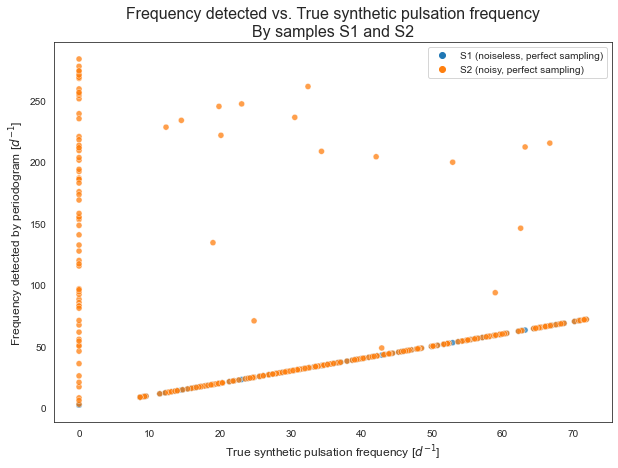

In [108]:
select = ['S1', 'S2']
select = [SAMPLES_FULL_NAMES[elem] for elem in select]
data = combined_df[combined_df['Sample'].isin(select)]
x = 'True_freq'
y = 'Det_freq'
hue = 'Sample'
size = None
alpha = 0.75
fig_title = "Frequency detected vs. True synthetic pulsation frequency\nBy samples S1 and S2"
xlabel = "True synthetic pulsation frequency [$d^{-1}$]"
ylabel = "Frequency detected by periodogram [$d^{-1}$]"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_08_Detected_vs_True_freq_S1_and_S2.jpg"

scatter_graph(data=data, x=x, y=y, hue=hue,size=size, alpha=alpha,
              fig_title=fig_title, xlabel=xlabel, ylabel=ylabel,
              fig_filename=fig_filename)



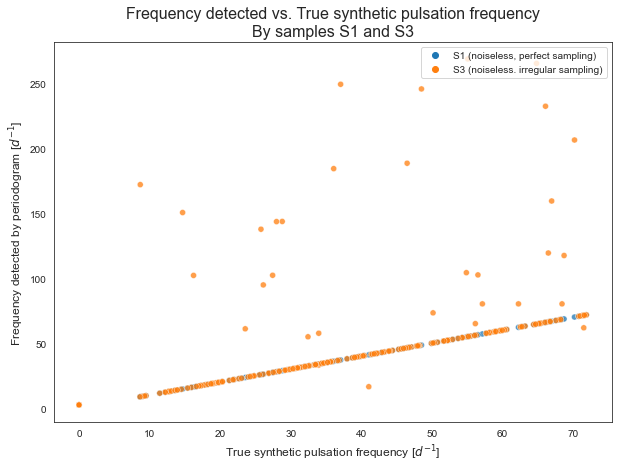

In [109]:
select = ['S1', 'S3']
select = [SAMPLES_FULL_NAMES[elem] for elem in select]
data = combined_df[combined_df['Sample'].isin(select)]
x = 'True_freq'
y = 'Det_freq'
hue = 'Sample'
size = None
alpha = 0.75
fig_title = "Frequency detected vs. True synthetic pulsation frequency\nBy samples S1 and S3"
xlabel = "True synthetic pulsation frequency [$d^{-1}$]"
ylabel = "Frequency detected by periodogram [$d^{-1}$]"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_09_Detected_vs_True_freq_S1_and_S3.jpg"

scatter_graph(data=data, x=x, y=y, hue=hue,size=size, alpha=alpha,
              fig_title=fig_title, xlabel=xlabel, ylabel=ylabel,
              fig_filename=fig_filename)



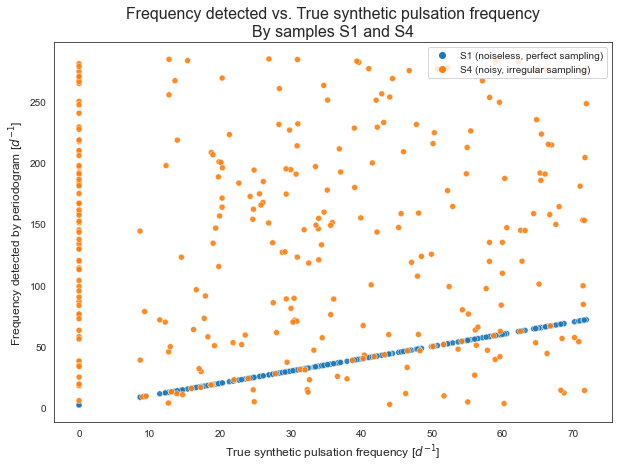

In [110]:
select = ['S1', 'S4']
select = [SAMPLES_FULL_NAMES[elem] for elem in select]
data = combined_df[combined_df['Sample'].isin(select)]
x = 'True_freq'
y = 'Det_freq'
hue = 'Sample'
size = None
alpha = 0.9
fig_title = "Frequency detected vs. True synthetic pulsation frequency\nBy samples S1 and S4"
xlabel = "True synthetic pulsation frequency [$d^{-1}$]"
ylabel = "Frequency detected by periodogram [$d^{-1}$]"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_10_Detected_vs_True_freq_S1_and_S4.jpg"

scatter_graph(data=data, x=x, y=y, hue=hue,size=size, alpha=alpha,
              fig_title=fig_title, xlabel=xlabel, ylabel=ylabel,
              fig_filename=fig_filename)



#### All samples together

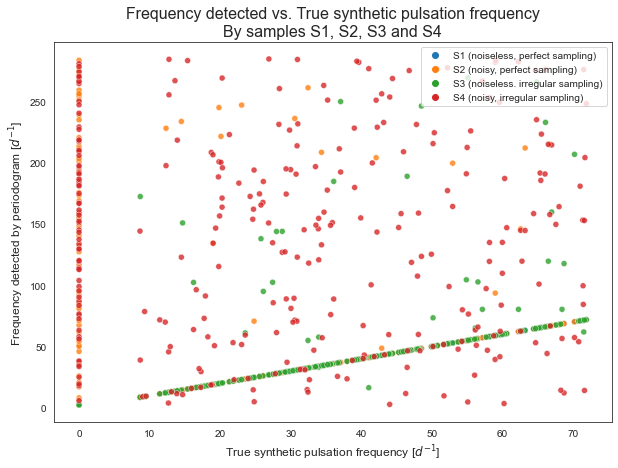

In [111]:
select = ['S1', 'S2', 'S3', 'S4']
select = [SAMPLES_FULL_NAMES[elem] for elem in select]
data = combined_df[combined_df['Sample'].isin(select)]
x = 'True_freq'
y = 'Det_freq'
hue = 'Sample'
size = None
alpha = 0.80
fig_title = "Frequency detected vs. True synthetic pulsation frequency\nBy samples S1, S2, S3 and S4"
xlabel = "True synthetic pulsation frequency [$d^{-1}$]"
ylabel = "Frequency detected by periodogram [$d^{-1}$]"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_11_Detected_vs_True_freq_S1_to_S4.jpg"

scatter_graph(data=data, x=x, y=y, hue=hue,size=size, alpha=alpha,
              fig_title=fig_title, xlabel=xlabel, ylabel=ylabel,
              fig_filename=fig_filename)



### Detected amplitude vs true amplitude

In [112]:
combined_df

,Sample_ID,Sample,True_freq,True_amp,Det_freq,Det_amp,RelError_freq,RelError_amp,FAP
0,S1,"S1 (noiseless, perfect sampling)",19.790,0.730,19.790,0.730,0.000,0.000,0.000
1,S1,"S1 (noiseless, perfect sampling)",0.000,0.000,2.400,0.000,NaN,NaN,NaN
2,S1,"S1 (noiseless, perfect sampling)",0.000,0.000,2.400,0.000,NaN,NaN,NaN
3,S1,"S1 (noiseless, perfect sampling)",47.090,0.570,47.090,0.570,0.000,0.000,0.000
4,S1,"S1 (noiseless, perfect sampling)",54.970,0.810,54.970,0.810,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
1195,S4,"S4 (noisy, irregular sampling)",59.960,0.360,109.740,2.763,0.830,6.675,0.997
1196,S4,"S4 (noisy, irregular sampling)",43.870,0.890,59.700,3.131,0.361,2.518,1.000
1197,S4,"S4 (noisy, irregular sampling)",48.080,1.440,158.810,3.263,2.303,1.266,1.000
1198,S4,"S4 (noisy, irregular sampling)",47.940,1.280,107.420,35.407,1.241,26.662,1.000


In [113]:
combined_df.describe()

,True_freq,True_amp,Det_freq,Det_amp,RelError_freq,RelError_amp,FAP
count,"1,200.000","1,200.000","1,200.000","1,200.000",924.000,924.000,"1,062.000"
mean,30.761,0.640,70.625,2.961,0.967,3.199,0.320
std,23.050,0.493,72.800,16.037,2.577,18.942,0.436
min,0.000,0.000,2.400,0.000,-0.942,-0.423,0.000
25%,12.015,0.180,21.810,0.349,0.000,-0.004,0.000
50%,30.505,0.630,45.995,0.885,0.000,0.000,0.000
75%,50.185,1.045,72.735,1.369,0.000,0.129,0.906
max,71.850,1.500,284.470,352.090,21.306,308.459,1.000


#### By pairs

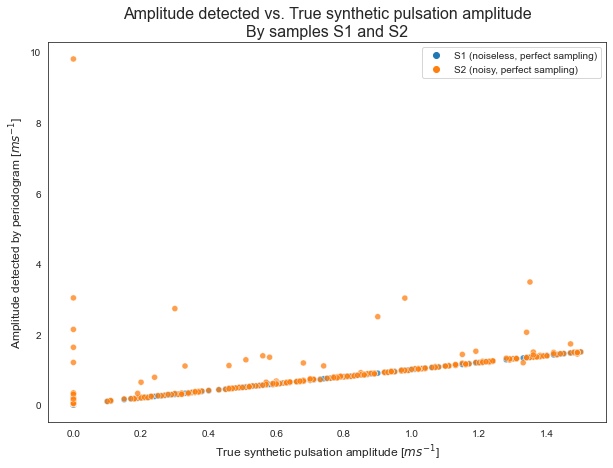

In [114]:
select = ['S1', 'S2']
select = [SAMPLES_FULL_NAMES[elem] for elem in select]
data = combined_df[combined_df['Sample'].isin(select)]
x = 'True_amp'
y = 'Det_amp'
hue = 'Sample'
size = None
alpha = 0.75
fig_title = "Amplitude detected vs. True synthetic pulsation amplitude\nBy samples S1 and S2"
xlabel = "True synthetic pulsation amplitude [$ms^{-1}$]"
ylabel = "Amplitude detected by periodogram [$ms^{-1}$]"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_12_Detected_vs_True_amp_S1_and_S2.jpg"

scatter_graph(data=data, x=x, y=y, hue=hue,size=size, alpha=alpha,
              fig_title=fig_title, xlabel=xlabel, ylabel=ylabel,
              fig_filename=fig_filename)



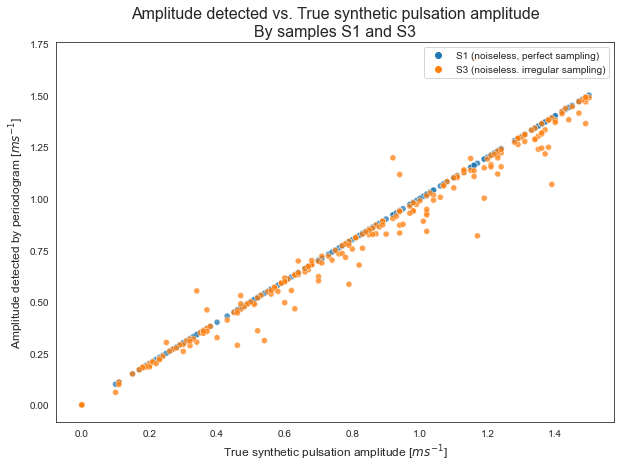

In [102]:
select = ['S1', 'S3']
select = [SAMPLES_FULL_NAMES[elem] for elem in select]
data = combined_df[combined_df['Sample'].isin(select)]
x = 'True_amp'
y = 'Det_amp'
hue = 'Sample'
size = None
alpha = 0.75
fig_title = "Amplitude detected vs. True synthetic pulsation amplitude\nBy samples S1 and S3"
xlabel = "True synthetic pulsation amplitude [$ms^{-1}$]"
ylabel = "Amplitude detected by periodogram [$ms^{-1}$]"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_13_Detected_vs_True_amp_S1_and_S3.jpg"

scatter_graph(data=data, x=x, y=y, hue=hue,size=size, alpha=alpha,
              fig_title=fig_title, xlabel=xlabel, ylabel=ylabel,
              fig_filename=fig_filename)



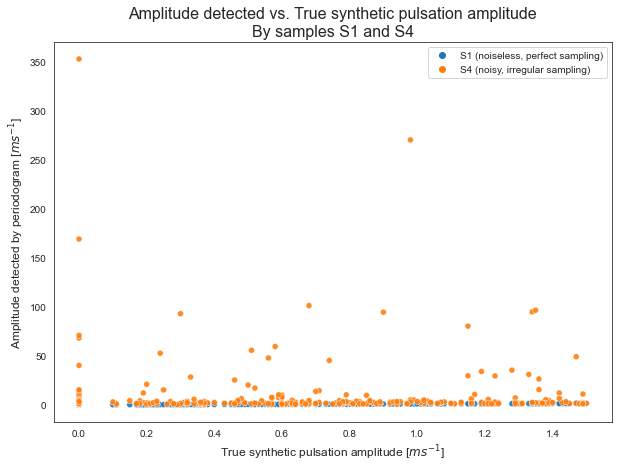

In [130]:
select = ['S1', 'S4']
select = [SAMPLES_FULL_NAMES[elem] for elem in select]
data = combined_df[combined_df['Sample'].isin(select)]
x = 'True_amp'
y = 'Det_amp'
hue = 'Sample'
size = None
alpha = 0.9
fig_title = "Amplitude detected vs. True synthetic pulsation amplitude\nBy samples S1 and S4"
xlabel = "True synthetic pulsation amplitude [$ms^{-1}$]"
ylabel = "Amplitude detected by periodogram [$ms^{-1}$]"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_14_Detected_vs_True_amp_S1_and_S4.jpg"

scatter_graph(data=data, x=x, y=y, hue=hue,size=size, alpha=alpha,
              fig_title=fig_title, xlabel=xlabel, ylabel=ylabel,
              fig_filename=fig_filename)



Outliers are compressing most of the data, so they are hardly discernible, we need to limit the vertical axis.

#### Limit the vertical axis range

In [123]:
len(combined_df[combined_df['Det_amp'] > 150])

3

Number of outliers discarded = 4



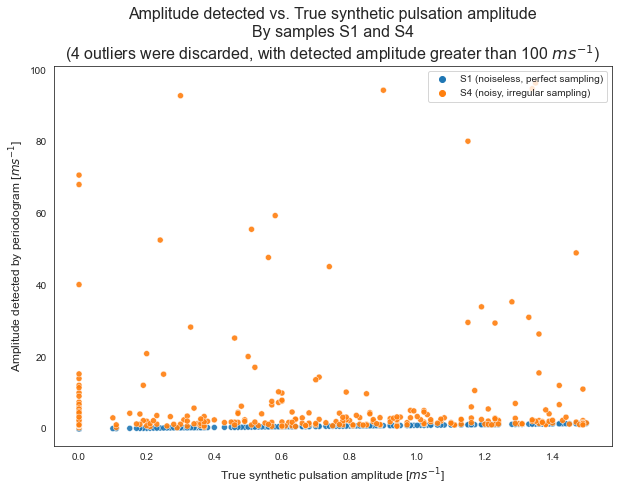

In [135]:
limit_det_amp = 100
outliers_discarded = len(combined_df[combined_df['Det_amp'] > limit_det_amp])
print("Number of outliers discarded = %d" %outliers_discarded)
print()
select = ['S1', 'S4']
select = [SAMPLES_FULL_NAMES[elem] for elem in select]
data = combined_df[(combined_df['Sample'].isin(select)) & (combined_df['Det_amp'] <= limit_det_amp)]
x = 'True_amp'
y = 'Det_amp'
hue = 'Sample'
size = None
alpha = 0.9
fig_title = "Amplitude detected vs. True synthetic pulsation amplitude\n" \
    "By samples S1 and S4\n" \
    "(%d outliers were discarded, with detected amplitude greater than %d $ms^{-1}$)" \
    %(outliers_discarded, limit_det_amp)
xlabel = "True synthetic pulsation amplitude [$ms^{-1}$]"
ylabel = "Amplitude detected by periodogram [$ms^{-1}$]"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_14B_Detected_vs_True_amp_S1_and_S4.jpg"

scatter_graph(data=data, x=x, y=y, hue=hue,size=size, alpha=alpha,
              fig_title=fig_title, xlabel=xlabel, ylabel=ylabel,
              fig_filename=fig_filename)



#### All samples together

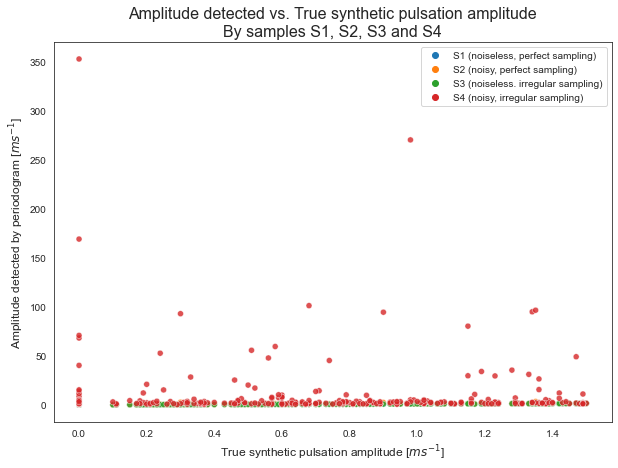

In [116]:
select = ['S1', 'S2', 'S3', 'S4']
select = [SAMPLES_FULL_NAMES[elem] for elem in select]
data = combined_df[combined_df['Sample'].isin(select)]
x = 'True_amp'
y = 'Det_amp'
hue = 'Sample'
size = None
alpha = 0.80
fig_title = "Amplitude detected vs. True synthetic pulsation amplitude\nBy samples S1, S2, S3 and S4"
xlabel = "True synthetic pulsation amplitude [$ms^{-1}$]"
ylabel = "Amplitude detected by periodogram [$ms^{-1}$]"
fig_filename = IMAGE_FOLDER + "LSTPeriod_35_15_Detected_vs_True_amp_S1_to_S4.jpg"

scatter_graph(data=data, x=x, y=y, hue=hue,size=size, alpha=alpha,
              fig_title=fig_title, xlabel=xlabel, ylabel=ylabel,
              fig_filename=fig_filename)



## Box plots

### Relative errors in frequency

<AxesSubplot:xlabel='Sample_ID', ylabel='RelError_freq'>

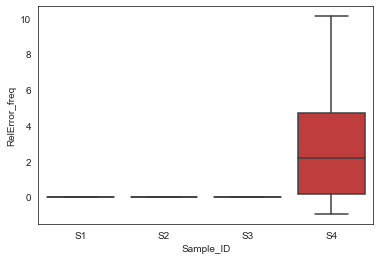

In [317]:
sns.boxplot(data=combined_df, y='RelError_freq', x='Sample_ID', showfliers=False)

#sns.boxplot(data=df, x="fare", y="alive", order=["yes", "no"])


### Relative errors in amplitude

<AxesSubplot:xlabel='Sample_ID', ylabel='RelError_amp'>

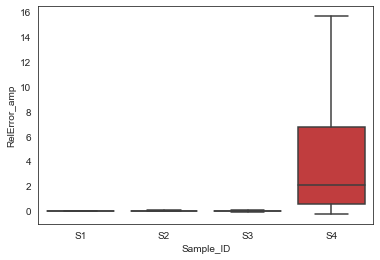

In [318]:
sns.boxplot(data=combined_df, y='RelError_amp', x='Sample_ID', showfliers=False)

#sns.boxplot(data=df, x="fare", y="alive", order=["yes", "no"])


### Reported FAP

<AxesSubplot:xlabel='Sample_ID', ylabel='FAP'>

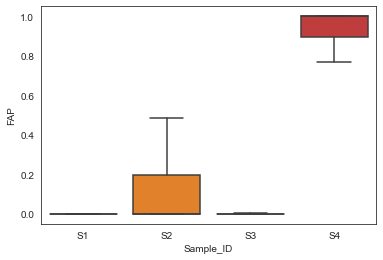

In [319]:
sns.boxplot(data=combined_df, y='FAP', x='Sample_ID', showfliers=False)

#sns.boxplot(data=df, x="fare", y="alive", order=["yes", "no"])
